In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("Uber Request Data.csv")

In [10]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [12]:
len(df['Request id'].unique())

6745

In [13]:
df.shape

(6745, 6)

In [15]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [21]:
#get precentage of null values
df.isnull().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [34]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'],dayfirst=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [26]:
#df['Request timestamp'] = df['Request timestamp'].astype(str)

In [27]:
df['Request timestamp'] = df['Request timestamp'].replace('/','-')

In [28]:
df['Request timestamp']

0       2016-07-11 11:51:00
1       2016-07-11 17:57:00
2       2016-07-12 09:17:00
3       2016-07-12 21:08:00
4       2016-07-13 08:33:16
               ...         
6740    2016-07-15 23:49:03
6741    2016-07-15 23:50:05
6742    2016-07-15 23:52:06
6743    2016-07-15 23:54:39
6744    2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: object

In [29]:
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'],dayfirst=True)

In [30]:
df['Drop timestamp']

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [36]:
import datetime as dt

In [37]:
req_hour=df["Request timestamp"].dt.hour

In [39]:
req_hour

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: Request timestamp, Length: 6745, dtype: int64

In [40]:
##here we seperated hur and day
df['req_hour'] = req_hour

In [41]:
req_day = df['Request timestamp'].dt.day

In [42]:
df['req_day'] = req_day

In [43]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


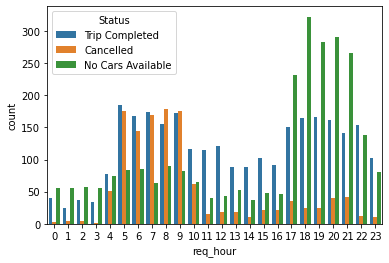

In [46]:
sns.countplot(x='req_hour',data=df,hue='Status')
plt.show()

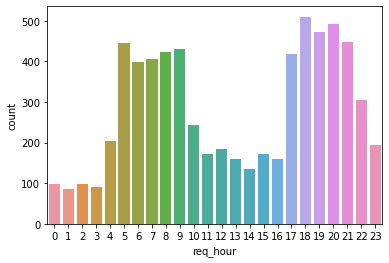

In [45]:
sns.countplot(x='req_hour',data=df)
plt.show()

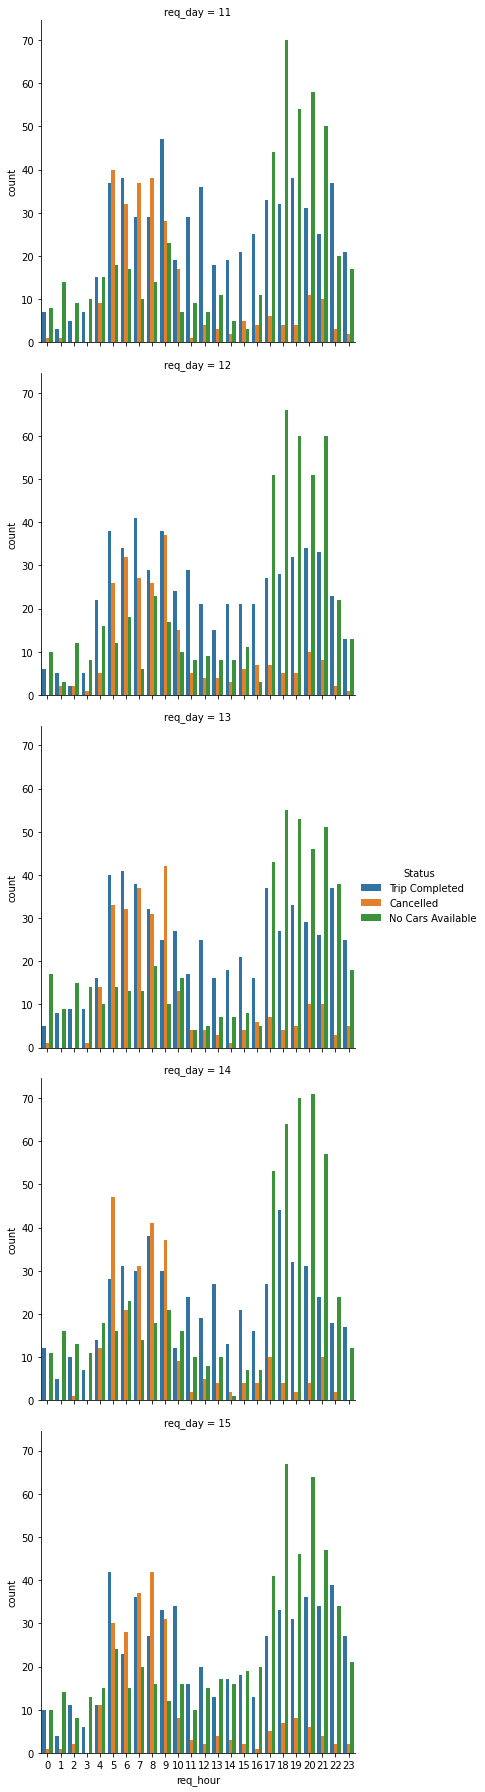

In [50]:
sns.catplot(x='req_hour',data=df,row='req_day',kind = 'count',hue='Status')

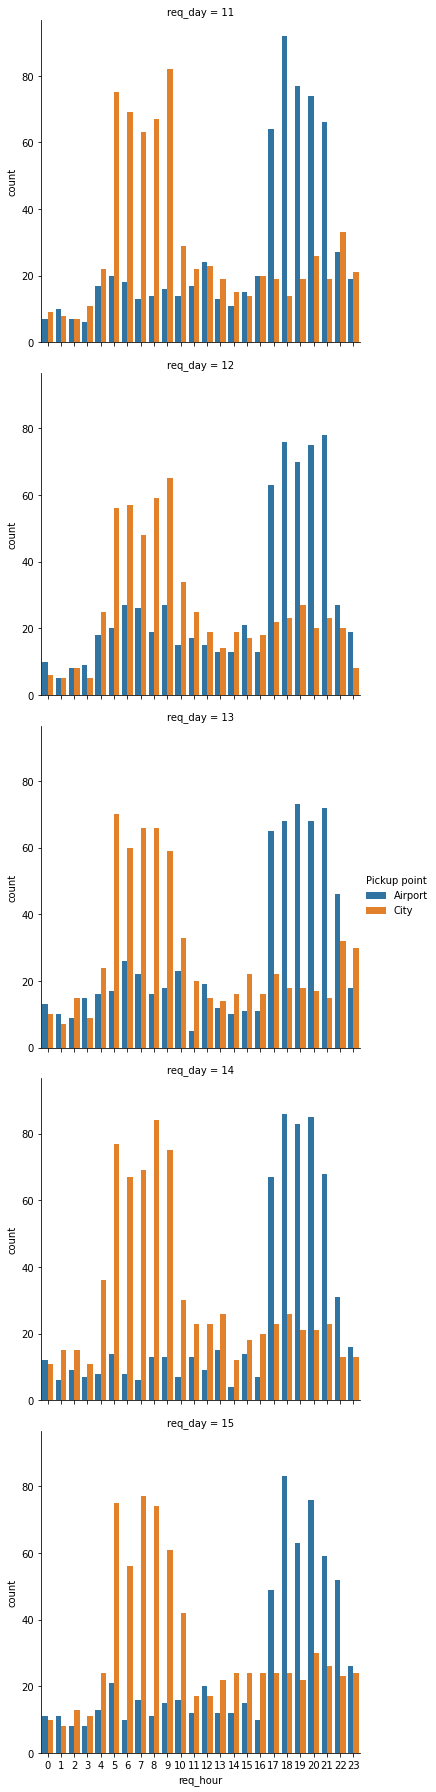

In [51]:
sns.catplot(x='req_hour',data=df,row='req_day',kind = 'count',hue='Pickup point')

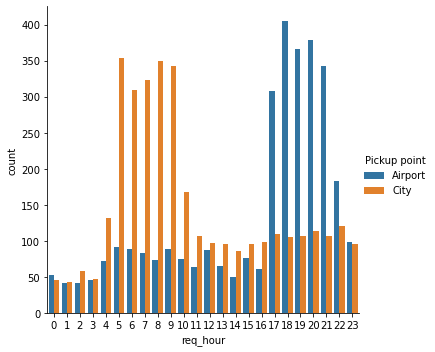

In [52]:
sns.catplot(x='req_hour',data=df,kind = 'count',hue='Pickup point')

In [54]:
##so now we create batches
df['time_slot'] = 0
j=0
for i in df['req_hour']:
    if df.iloc[j,6]<5:
        df.iloc[j,8] = 'Pre_Morning'
    elif df.iloc[j,6]<10:
        df.iloc[j,8] = 'Morning_Rush'
    elif df.iloc[j,6]<17:
        df.iloc[j,8] = 'Day_Time'
    elif df.iloc[j,6]<22:
        df.iloc[j,8] = 'Evening_Rush'
    else:
        df.iloc[j,8] = 'Late_Night'
    j=j+1

In [55]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night


In [57]:
df['time_slot'].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: time_slot, dtype: int64

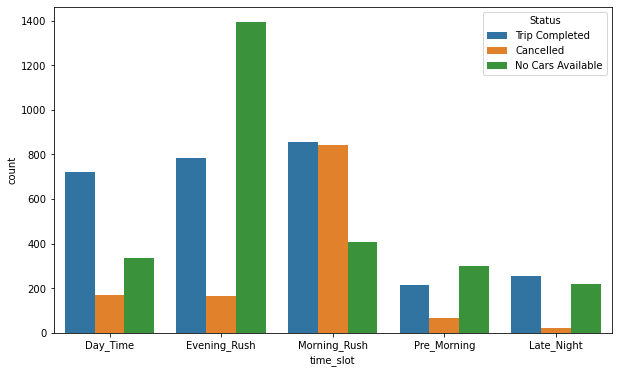

In [65]:
plt.figure(figsize=(10,6))
sns.countplot(x='time_slot',data=df,hue='Status')
plt.show()

In [68]:
df_morning_rush = df[df['time_slot'] == 'Morning_Rush']

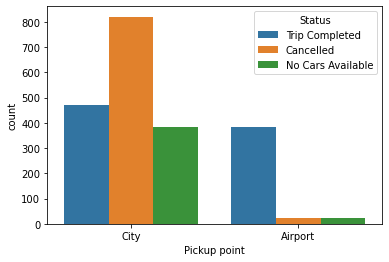

In [71]:
sns.countplot(x='Pickup point',hue = 'Status',data=df_morning_rush)

# severity of problem by location and their count (cancellation of cab as per pickup location at morning rush hours)

In [74]:
df_airport_cancelled=df_morning_rush.loc[(df_morning_rush['Pickup point'] == 'Airport') & (df_morning_rush['Status']=='Cancelled')]

In [79]:
df_airport_cancelled.shape[0]

23

In [76]:
df_city_cancelled=df_morning_rush.loc[(df_morning_rush['Pickup point'] == 'City') & (df_morning_rush['Status']=='Cancelled')]

In [78]:
df_city_cancelled.shape[0]

820

In [111]:
df_city_cancelled=df_morning_rush.loc[(df_morning_rush['Pickup point'] == 'City') & (df_morning_rush['Status']=='No Cars Available')].shape[0]

# supply and demand

In [83]:
df_morning_rush.loc[(df_morning_rush['Pickup point']=='City') & (df_morning_rush['Status'] =='Trip Completed'  )].shape

(472, 9)

In [86]:
df_morning_rush.loc[(df_morning_rush['Pickup point']=='Airport')  ].shape

(426, 9)

In [87]:
df_morning_rush.loc[(df_morning_rush['Pickup point']=='Airport') & (df_morning_rush['Status'] =='Trip Completed'  )].shape

(382, 9)

# supply and demand evening rush

In [88]:
df_evening_rush = df[df['time_slot']=='Evening_Rush']

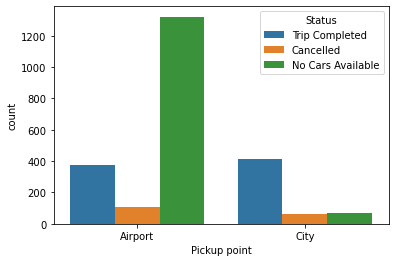

In [90]:
sns.countplot(x='Pickup point',hue = 'Status',data=df_evening_rush)

In [89]:
df_city_cancelled=df_evening_rush.loc[(df_evening_rush['Pickup point'] == 'City') & (df_evening_rush['Status']=='Cancelled')]

In [92]:
df_city_cancelled.shape[0]

60

In [96]:
#demand
df_evening_rush.loc[(df_evening_rush['Pickup point']=='City')  ].shape[0]

542

In [97]:
#supply
df_evening_rush.loc[(df_evening_rush['Pickup point']=='City') & (df_evening_rush['Status'] =='Trip Completed'  )].shape[0]

(411, 9)

In [98]:
#demand
df_evening_rush.loc[(df_evening_rush['Pickup point']=='Airport')  ].shape[0]

1800

In [100]:
#supply
df_evening_rush.loc[(df_evening_rush['Pickup point']=='Airport') & (df_evening_rush['Status'] =='Trip Completed'  )].shape[0]

373

In [137]:
df_evening_rush.loc[(df_evening_rush['Pickup point']=='Airport') & (df_evening_rush['Status'] =='No Cars Available'  )].shape[0]

1321

# severity problem at each location by looking at cancellation of cabs of the pickup location

In [101]:
df_evening_rush.loc[(df_evening_rush['Pickup point']=='Airport') & (df_evening_rush['Status'] =='Cancelled'  )].shape[0]

106

In [103]:
df_evening_rush.loc[(df_evening_rush['Pickup point']=='City') & (df_evening_rush['Status'] =='Cancelled'  )].shape[0]

60

# severity of problem by location in morning rush

In [104]:
#demand
df_morning_rush.loc[(df_morning_rush['Pickup point']=='City')  ].shape[0]

1677

In [105]:
#supply
df_morning_rush.loc[(df_morning_rush['Pickup point']=='City') & (df_morning_rush['Status'] =='Trip Completed'  )].shape[0]

472

In [106]:
#demand
df_morning_rush.loc[(df_morning_rush['Pickup point']=='Airport')  ].shape[0]

426

In [107]:
#supply
df_morning_rush.loc[(df_morning_rush['Pickup point']=='Airport') & (df_morning_rush['Status'] =='Trip Completed'  )].shape[0]

382


# severity problem at each location by looking at cancellation of cabs of the pickup location 

In [108]:
df_morning_rush.loc[(df_morning_rush['Pickup point']=='Airport') & (df_morning_rush['Status'] =='Cancelled'  )].shape[0]

23

In [109]:
df_morning_rush.loc[(df_morning_rush['Pickup point']=='City') & (df_morning_rush['Status'] =='Cancelled'  )].shape[0]

820

In [112]:
df_morning_rush.loc[(df_morning_rush['Pickup point']=='City') & (df_morning_rush['Status'] =='No Cars Available	'  )].shape[0]

0

In [113]:
df_morning_rush.loc[(df_morning_rush['Pickup point']=='Airport') & (df_morning_rush['Status'] =='No Cars Available	'  )].shape[0]

0

# pie chart

In [115]:
df_evening_city=df.loc[(df['Pickup point']=='City')&(df['time_slot']=='Evening_Rush')]

In [120]:
df_evening_city_counts=pd.DataFrame(df_evening_city['Status'].value_counts())

In [121]:
df_evening_city_counts

,Status
Trip Completed,411
No Cars Available,71
Cancelled,60


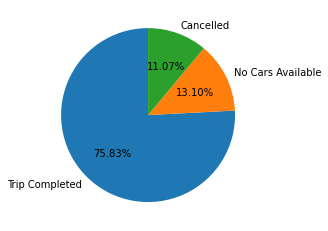

In [124]:
fig,ax = plt.subplots()
ax.pie(df_evening_city_counts['Status'].values,labels=df_evening_city_counts['Status'].index,autopct='%.2f%%',startangle=90)
plt.show()

In [132]:
df_morning_city = df.loc[(df['Pickup point']=='City')&(df['time_slot']=='Morning_Rush')]

In [133]:
df_morning_city_counts = pd.DataFrame(df_morning_city['Status'].value_counts())

In [134]:
df_morning_city_counts

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385


In [135]:
df_morning_city_counts['Status'].index

Index(['Cancelled', 'Trip Completed', 'No Cars Available'], dtype='object')

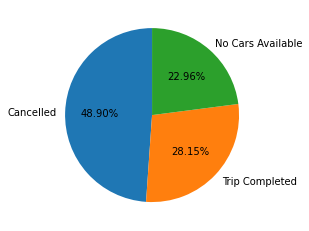

In [136]:
fig,ax = plt.subplots()
ax.pie(df_morning_city_counts['Status'].values,labels=df_morning_city_counts['Status'].index,autopct='%.2f%%',startangle=90)
plt.show()

In [138]:
df_evening_airport=df.loc[(df['Pickup point']=='Airport')&(df['time_slot']=='Evening_Rush')]

In [140]:
df_evening_airport_counts = pd.DataFrame(df_evening_airport['Status'].value_counts())

In [141]:
df_evening_airport_counts

,Status
No Cars Available,1321
Trip Completed,373
Cancelled,106


In [142]:
df_evening_airport_counts['Status'].index

Index(['No Cars Available', 'Trip Completed', 'Cancelled'], dtype='object')

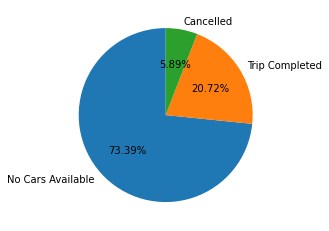

In [143]:
fig,ax = plt.subplots()
ax.pie(df_evening_airport_counts['Status'].values,labels=df_evening_airport_counts['Status'].index,autopct='%.2f%%',startangle=90)
plt.show()

# Inferences

In [ ]:
1.They could be given a bonus for each trip they complete from the city to the airport in the evening rush time.this will ensure less no. of trips are cancelled
2.uber can pay for the gas mileage of drivers to come back to the city without a ride
3.drivers can again be given bonus to complete the trip from the airport in the evening . This will ensure that the supply incerases at the airport
4.uber can also pay drivers to come without a passanger to the airport
5.another way could be to increase licenses of car pooling taxies so that leser number of cars can serve more passangers